In [1]:
import torch
import torch.nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from boardGPT.models import GameAutoEncoder
from transformers import AutoTokenizer

In [2]:
model, model_config = GameAutoEncoder.from_pretrained(repo_id="theartificialis/Othello-Synthetic-AutoEncoder-20m-S")

In [3]:
tokenizer = AutoTokenizer.from_pretrained("theartificialis/Othello-Synthetic-AutoEncoder-20m-S", subfolder="tokenizer")

## Encoding - Decoding

In [4]:
from boardGPT.datasets import GameDataset
val_dataset = GameDataset(
    data_dir="../../data/othello/othello-synthetic",
    split="val"
)

In [51]:
x, y = val_dataset[0]

In [52]:
x

'<pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> f5'

In [53]:
y

'<pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> f5 d6'

In [54]:
move_enc = model.encode_moves(x, tokenizer=tokenizer)
move_enc

tensor([[ 0.8094, -0.0556,  0.5538, -0.6741,  1.1444,  0.2431, -0.2534,  0.3271,
          0.3001, -0.1550,  1.2066, -0.2482, -0.2778,  1.0836, -0.5427, -0.1659,
         -0.3495,  1.3989,  0.2858,  0.6753, -0.6985,  1.2231, -0.2756,  0.7342,
         -0.8568,  0.7482, -0.3453, -0.7339, -0.5553,  0.0491, -0.1774,  0.4920,
         -0.1371,  0.7757, -0.4033, -0.8505, -1.5627,  0.8095, -0.4008, -0.0666,
          0.7102, -0.0200,  0.1841, -1.2267, -0.2639,  0.7876,  0.0350, -0.4683,
          2.0578,  0.5639,  2.8878,  0.8402, -0.4124,  0.4735, -0.2466,  0.4025,
         -0.8661,  0.5343,  0.2610,  0.4758,  0.2829, -0.3312,  1.9435,  0.1625]])

In [55]:
move_dec = model.decode_moves(move_enc, tokenizer=tokenizer)
move_dec

'<pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> f5'

## Similarity Matrix (legal vs illegal moves)

In [56]:
print(f"x: {x}")
print(f"y: {y}")

x: <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> f5
y: <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> f5 d6


In [57]:
from boardGPT import othello

# List of valid and invalids
valid_games = list()
invalid_games = list()

# Base
base_game = x.split(' ')
base_game = [m for m in base_game if m != '<pad>']

# Get invalid and valid moves
for col in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']:
    for row in range(1, 9):
        game_moves = base_game + [f"{col}{row}"]
        try:
            othello(base_game + [f"{col}{row}"])
        except ValueError:
            invalid_games.append(' '.join(game_moves))
        else:
            valid_games.append(' '.join(game_moves))
        # end try
    # end for
# end for

In [58]:
valid_games

['f5 c3', 'f5 c4', 'f5 d3', 'f5 d6', 'f5 f4', 'f5 f6']

In [59]:
invalid_games

['f5 a1',
 'f5 a2',
 'f5 a3',
 'f5 a4',
 'f5 a5',
 'f5 a6',
 'f5 a7',
 'f5 a8',
 'f5 b1',
 'f5 b2',
 'f5 b3',
 'f5 b4',
 'f5 b5',
 'f5 b6',
 'f5 b7',
 'f5 b8',
 'f5 c1',
 'f5 c2',
 'f5 c5',
 'f5 c6',
 'f5 c7',
 'f5 c8',
 'f5 d1',
 'f5 d2',
 'f5 d4',
 'f5 d5',
 'f5 d7',
 'f5 d8',
 'f5 e1',
 'f5 e2',
 'f5 e3',
 'f5 e4',
 'f5 e5',
 'f5 e6',
 'f5 e7',
 'f5 e8',
 'f5 f1',
 'f5 f2',
 'f5 f3',
 'f5 f5',
 'f5 f7',
 'f5 f8',
 'f5 g1',
 'f5 g2',
 'f5 g3',
 'f5 g4',
 'f5 g5',
 'f5 g6',
 'f5 g7',
 'f5 g8',
 'f5 h1',
 'f5 h2',
 'f5 h3',
 'f5 h4',
 'f5 h5',
 'f5 h6',
 'f5 h7',
 'f5 h8']

In [60]:
base_enc = model.encode_moves(x, tokenizer=tokenizer)

In [61]:
invalid_embs = list()
# Compute embeddings of moves
for game in invalid_games:
    move_enc = model.encode_moves(game, tokenizer=tokenizer)
    invalid_embs.append(move_enc)
# end for
invalid_embs = torch.cat(invalid_embs, dim=0)
invalid_embs.shape

torch.Size([58, 64])

In [62]:
valid_embs = list()
# Compute embeddings of moves
for game in valid_games:
    move_enc = model.encode_moves(game, tokenizer=tokenizer)
    valid_embs.append(move_enc)
# end for
valid_embs = torch.cat(valid_embs, dim=0)
valid_embs.shape

torch.Size([6, 64])

In [63]:
# All embeddings
games_embs = torch.cat([base_enc, valid_embs, invalid_embs], dim=0)
games_embs.shape

torch.Size([65, 64])

In [64]:
encs_norm = F.normalize(games_embs, p=2, dim=1)
sim_matrix = torch.matmul(encs_norm, encs_norm.T)

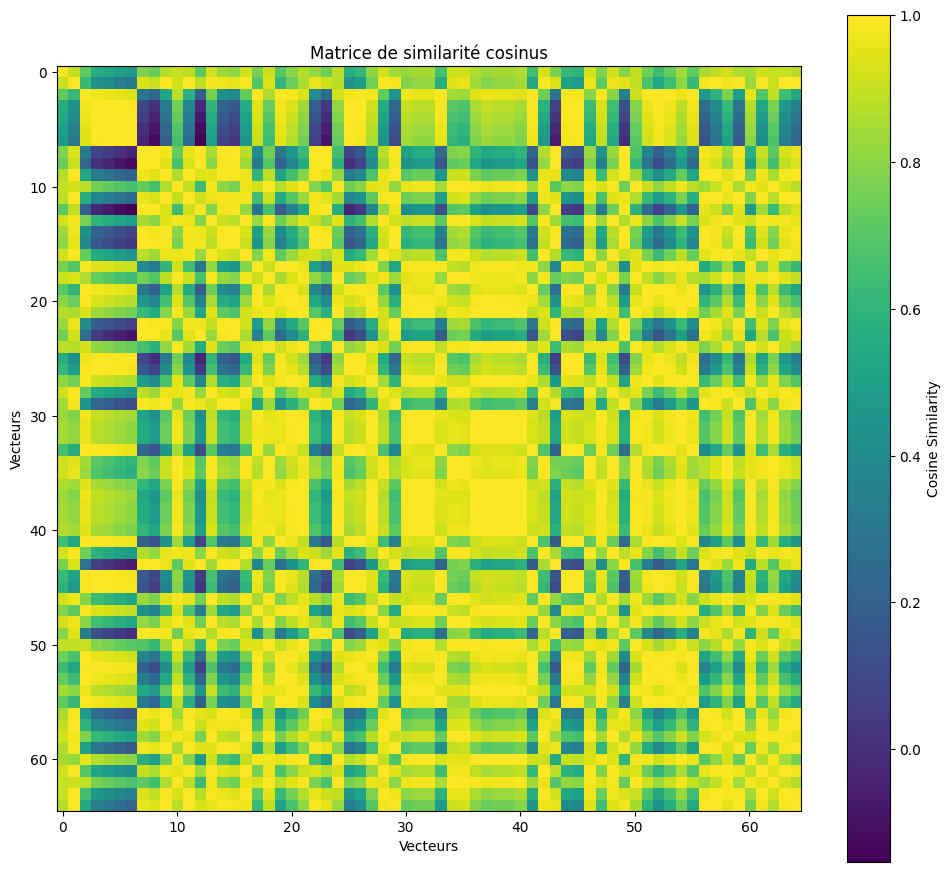

In [65]:
plt.figure(figsize=(12, 11))
plt.imshow(sim_matrix.numpy(), cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title("Matrice de similarité cosinus")
plt.xlabel("Vecteurs")
plt.ylabel("Vecteurs")
plt.show()

In [66]:
print(f"Sim base-valid: {sim_matrix[1:13, 0]}")

Sim base-valid: tensor([0.8995, 0.7126, 0.5671, 0.5344, 0.4967, 0.4683, 0.7773, 0.7301, 0.8700,
        0.9043, 0.8849, 0.7112])


In [67]:
print(f"Sim base-invalid: {sim_matrix[13:, 0]}")

Sim base-invalid: tensor([0.9204, 0.8293, 0.8058, 0.9181, 0.7649, 0.9097, 0.7021, 0.7957, 0.8728,
        0.8205, 0.7480, 0.8830, 0.5642, 0.6151, 0.8083, 0.9178, 0.8384, 0.8243,
        0.8439, 0.8439, 0.6658, 0.9144, 0.9172, 0.8624, 0.8317, 0.8439, 0.8439,
        0.8639, 0.6481, 0.9197, 0.7627, 0.6244, 0.5969, 0.9202, 0.7797, 0.9198,
        0.7913, 0.8924, 0.7472, 0.6375, 0.7281, 0.8390, 0.7168, 0.8485, 0.8913,
        0.9205, 0.8616, 0.8509, 0.9145, 0.9002, 0.9049, 0.8769])


In [68]:
predicted_move = torch.argmax(sim_matrix[1:, 0])
predicted_move

tensor(57)

In [69]:
if predicted_move.item() <= 12:
    print("ok!")
else:
    print("pas ok!")
# end if

pas ok!


## Similarity Matrix

In [10]:
a1_enc = model.encode_moves("a1", tokenizer=tokenizer)
c4_enc = model.encode_moves("c4", tokenizer=tokenizer)
f5_enc = model.encode_moves("f5", tokenizer=tokenizer)
d3_enc = model.encode_moves("d3", tokenizer=tokenizer)
e6_enc = model.encode_moves("e6", tokenizer=tokenizer)
c4_c5_enc = model.encode_moves("c4 c5", tokenizer=tokenizer)
f5_f4_enc = model.encode_moves("f5 f4", tokenizer=tokenizer)

In [11]:
encs = torch.cat((a1_enc, c4_enc, f5_enc, d3_enc, e6_enc, c4_c5_enc, f5_f4_enc), dim=0)

In [12]:
encs_norm = F.normalize(encs, p=2, dim=1)

In [13]:
sim_matrix = torch.matmul(encs_norm, encs_norm.T)

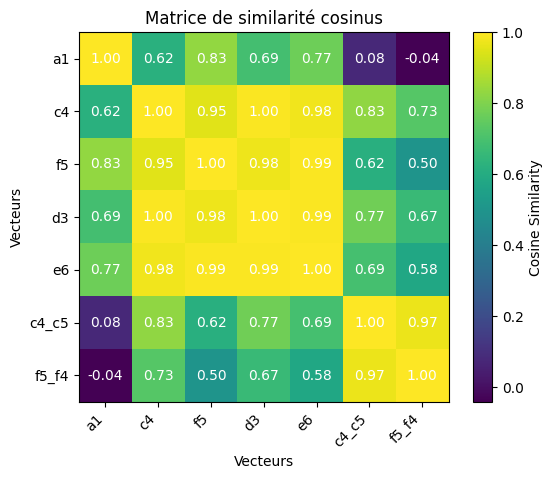

In [14]:
# Labels pour les vecteurs
labels = ["a1", "c4", "f5", "d3", "e6", "c4_c5","f5_f4"]

plt.imshow(sim_matrix.numpy(), cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title("Matrice de similarité cosinus")
plt.xlabel("Vecteurs")
plt.ylabel("Vecteurs")
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.yticks(range(len(labels)), labels)

for i in range(sim_matrix.shape[0]):
    for j in range(sim_matrix.shape[1]):
        value = sim_matrix[i, j].item()
        plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='white')
    # end for
# end for

plt.show()

## Visualisation

In [70]:
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
from boardGPT.datasets import GameDataset
from boardGPT import othello

In [73]:
embeddings, lengths, openings, last_moves, current_players = [], [], [], [], []

n_samples = 5000

for i in tqdm(range(n_samples)):
    x, y = val_dataset[i]

    # encode la séquence
    move_enc = model.encode_moves(x, tokenizer=tokenizer)  # (1, latent_dim)
    emb = move_enc.squeeze(0).detach().cpu().numpy()

    # attributs du jeu
    seq = y.replace("<pad>", "").strip()
    moves = seq.split()
    length = len(moves)
    first_move = moves[0] if len(moves) > 0 else "<none>"
    last_move = moves[-1] if len(moves) > 0 else "<none>"

    # joueur actuel
    game = othello(" ".join(moves))
    player = game.current_player  # 1 ou 2

    # stocker
    embeddings.append(emb)
    lengths.append(length)
    openings.append(first_move)
    last_moves.append(last_move)
    current_players.append(player)

    if i >= n_samples:
        break
    # end if
# end for

# Convertir en numpy
embeddings = np.stack(embeddings)
df_meta = pd.DataFrame({
    "length": lengths,
    "opening": openings,
    "last_move": last_moves,
    "player": current_players,
})

print("Embeddings shape:", embeddings.shape)
print(df_meta.head())

100%|██████████| 5000/5000 [01:37<00:00, 51.08it/s] 

Embeddings shape: (5000, 64)
   length opening last_move  player
0      60      f5        a3       1
1      52      c4        a5       1
2      31      f5        h7       2
3      43      c4        c8       2
4      31      c4        f8       2


In [80]:
import umap.umap_ as umap
print("Computing UMAP...")
umap_emb = umap.UMAP(n_neighbors=30, min_dist=0.1, metric="euclidean").fit_transform(embeddings)


Computing UMAP...


In [81]:
print("Computing t-SNE...")
tsne_emb = TSNE(n_components=2, perplexity=30).fit_transform(embeddings)

Computing t-SNE...


In [86]:
def plot_embedding(emb, labels, title):
    plt.figure(figsize=(12, 10))
    plt.scatter(emb[:,0], emb[:,1], c=labels, cmap="Spectral", s=8, alpha=0.8)
    plt.title(title)
    plt.xticks([]); plt.yticks([])
    plt.tight_layout()
    plt.show()
# end def plot_embedding

In [87]:
def plot_categorical(emb, labels, title):
    unique = sorted(list(set(labels)))
    colors = {u: plt.cm.tab20(i % 20) for i, u in enumerate(unique)}
    plt.figure(figsize=(12, 10))
    for u in unique:
        idx = [i for i, l in enumerate(labels) if l == u]
        plt.scatter(emb[idx,0], emb[idx,1], s=10, color=colors[u], label=u, alpha=0.8)
    # end for
    plt.legend(markerscale=2, bbox_to_anchor=(1.05,1), loc="upper left", fontsize=7)
    plt.title(title)
    plt.xticks([]); plt.yticks([])
    plt.tight_layout()
    plt.show()
# end def plot_categorical

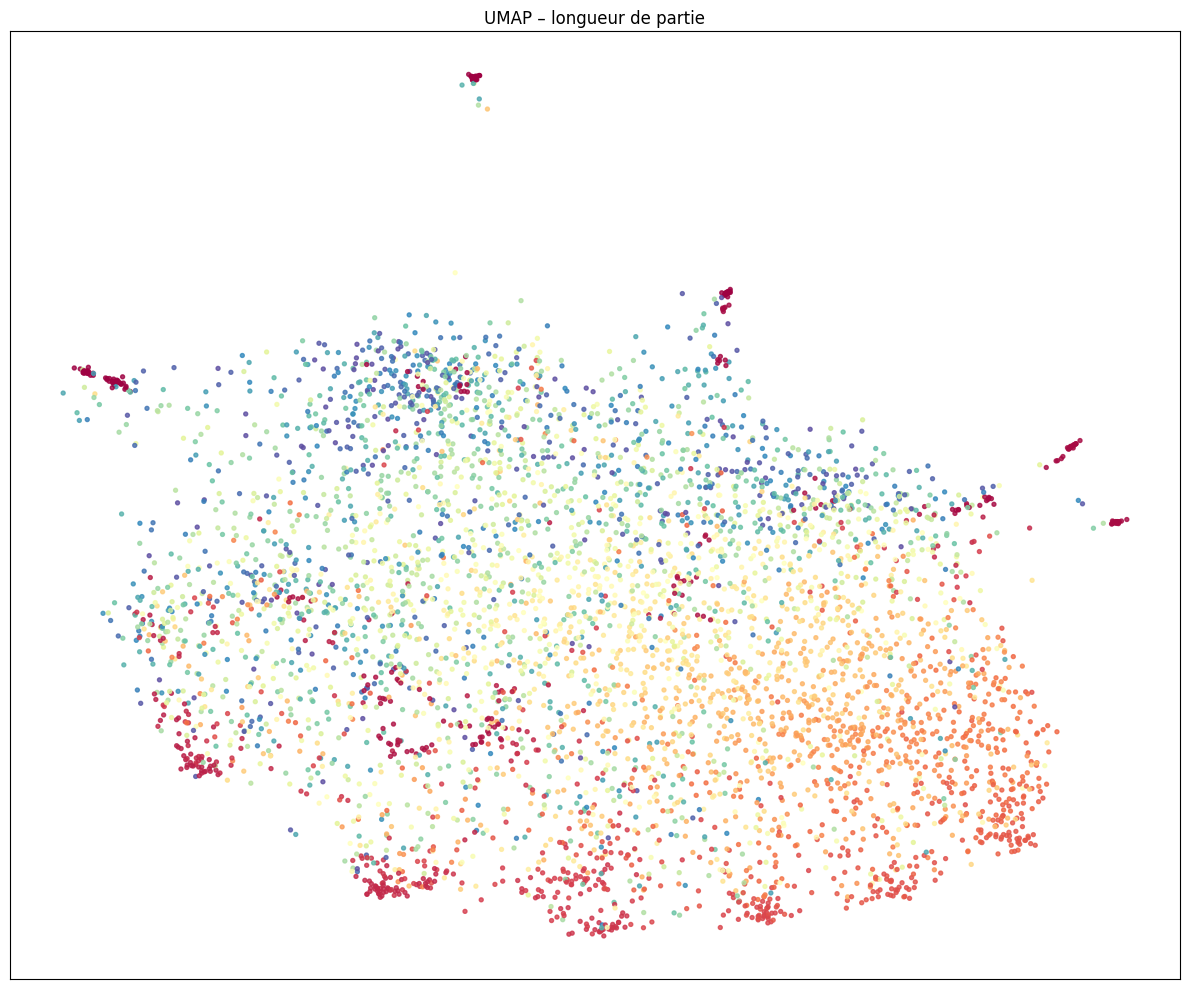

In [88]:
plot_embedding(umap_emb, df_meta["length"], "UMAP – longueur de partie")

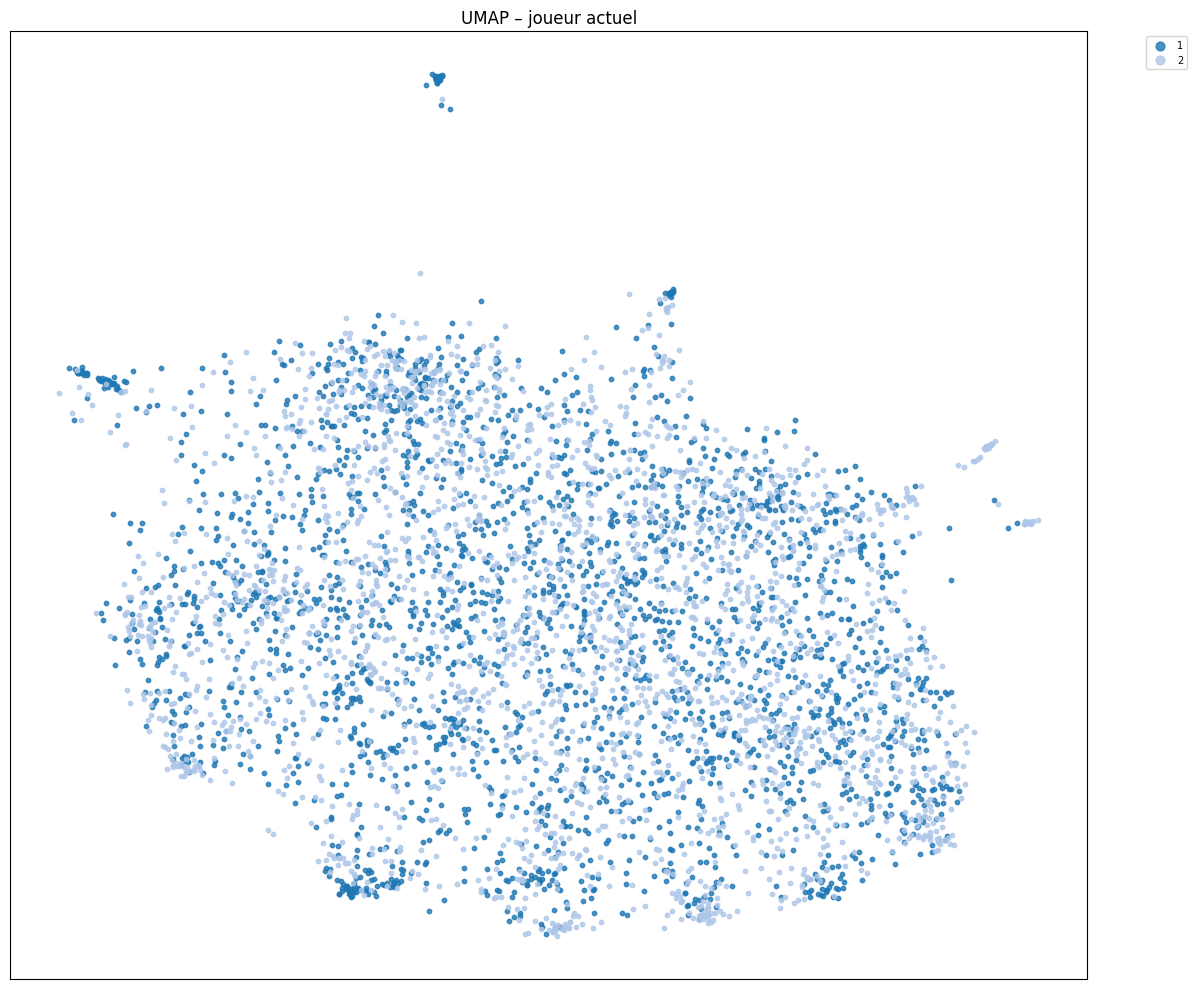

In [89]:
plot_categorical(umap_emb, df_meta["player"], "UMAP – joueur actuel")

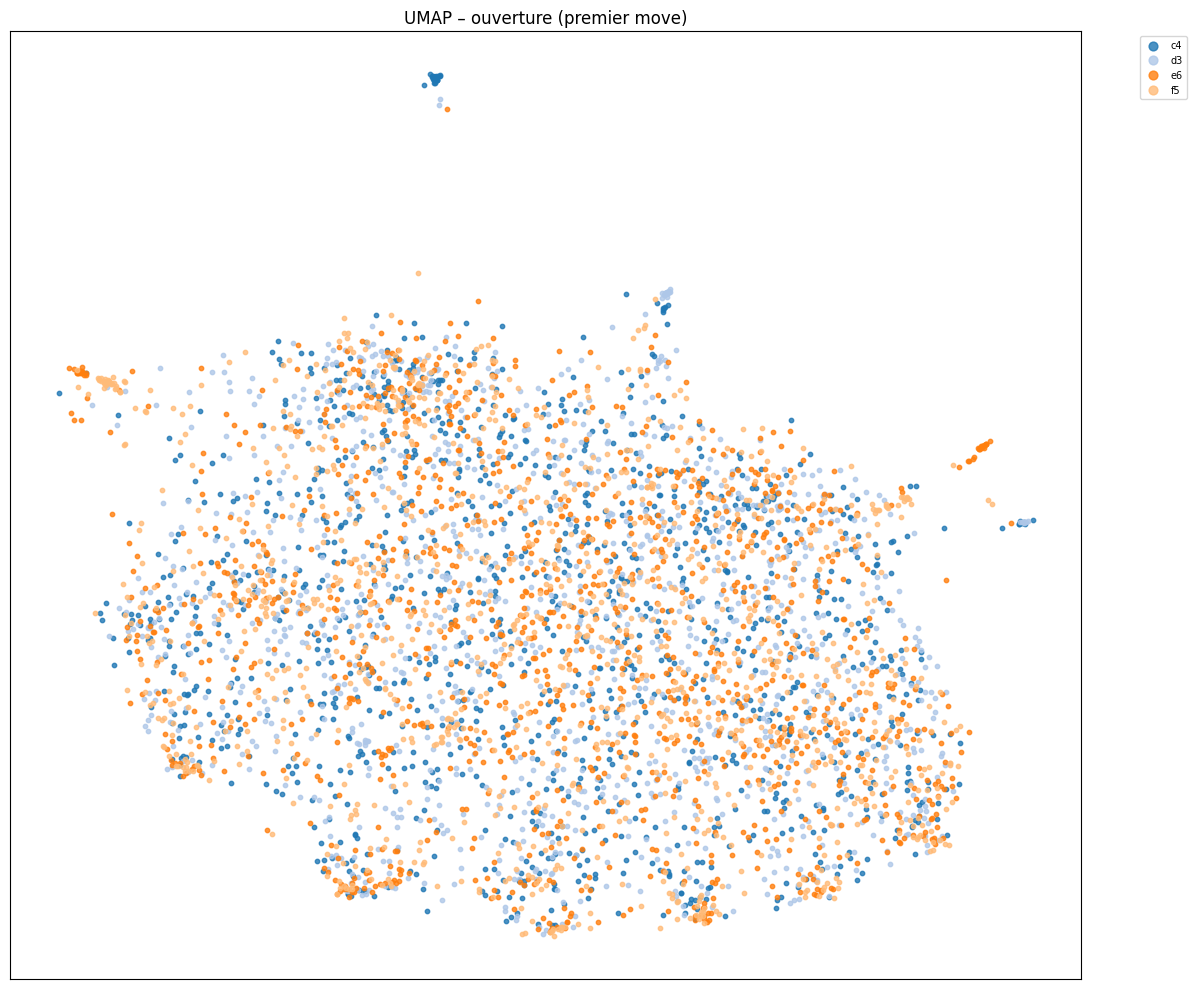

In [90]:
plot_categorical(umap_emb, df_meta["opening"], "UMAP – ouverture (premier move)")

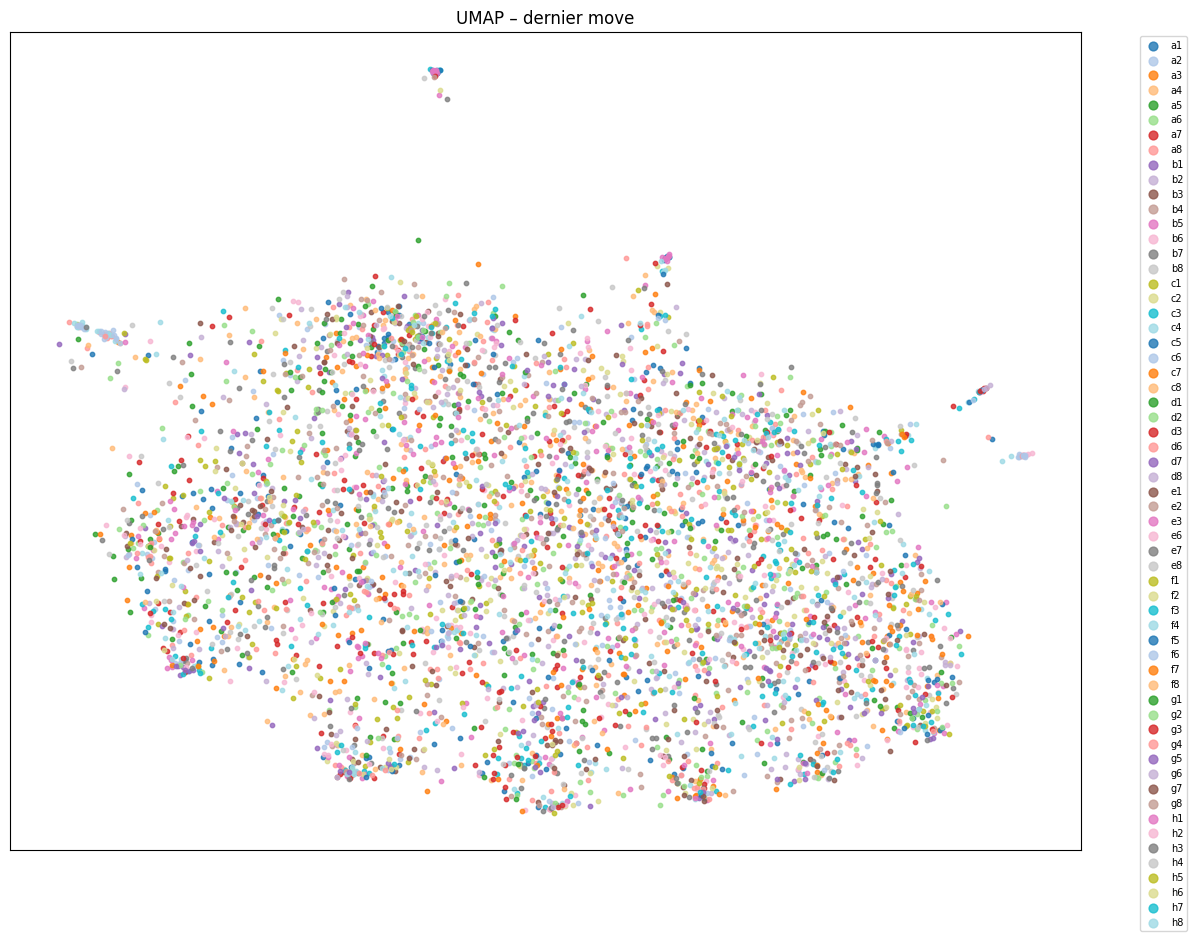

In [91]:
plot_categorical(umap_emb, df_meta["last_move"], "UMAP – dernier move")

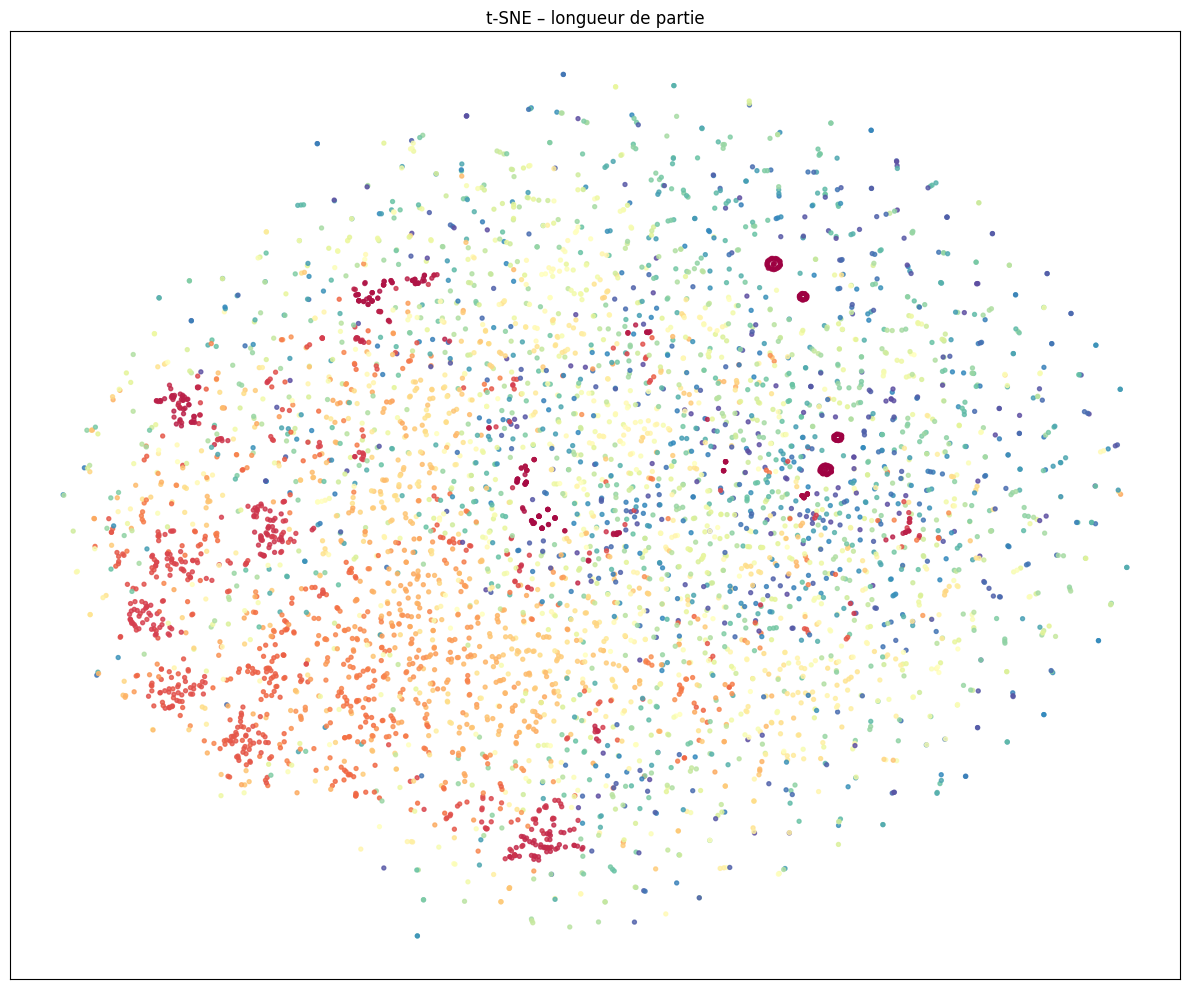

In [92]:
plot_embedding(tsne_emb, df_meta["length"], "t-SNE – longueur de partie")

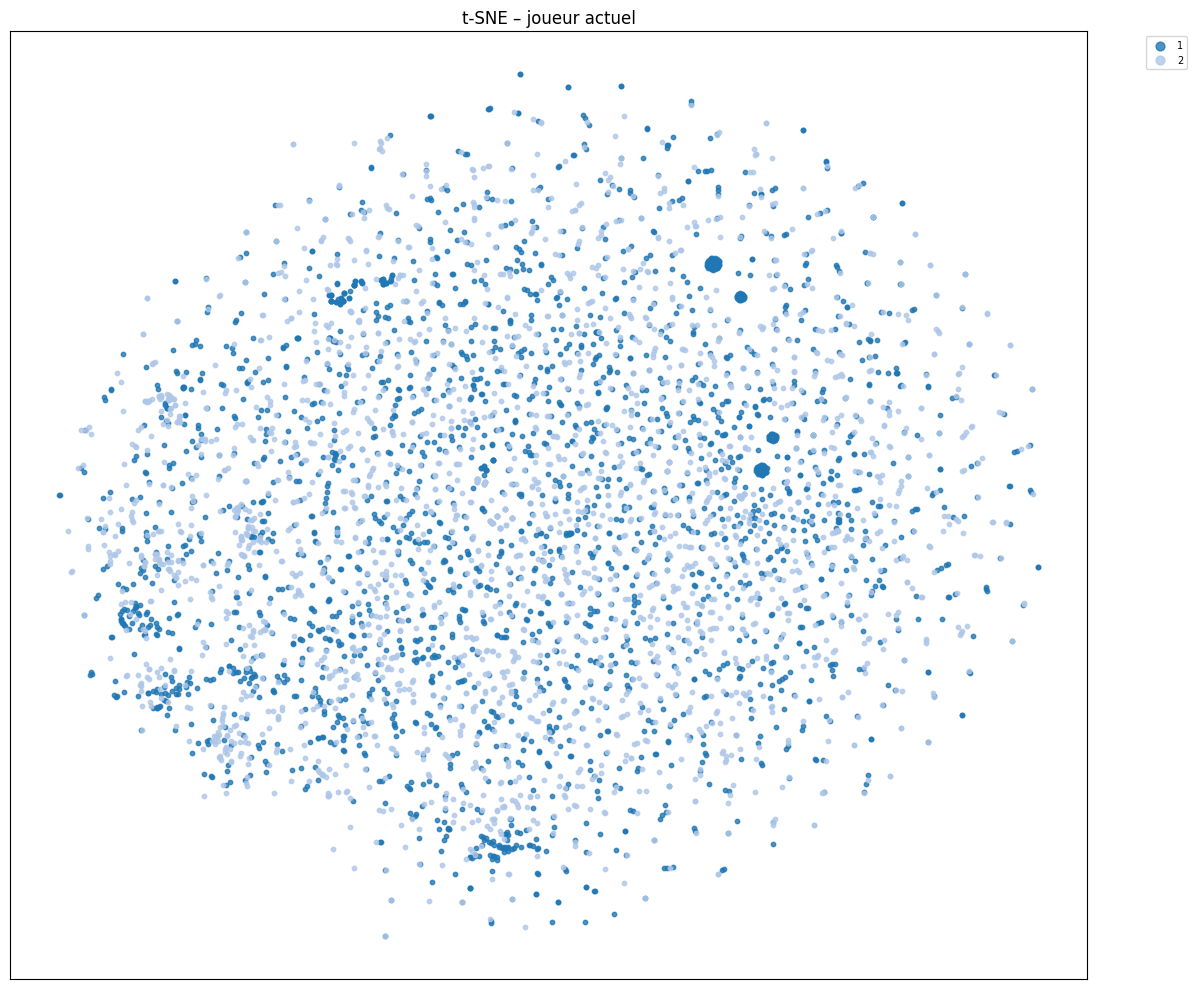

In [93]:
plot_categorical(tsne_emb, df_meta["player"], "t-SNE – joueur actuel")

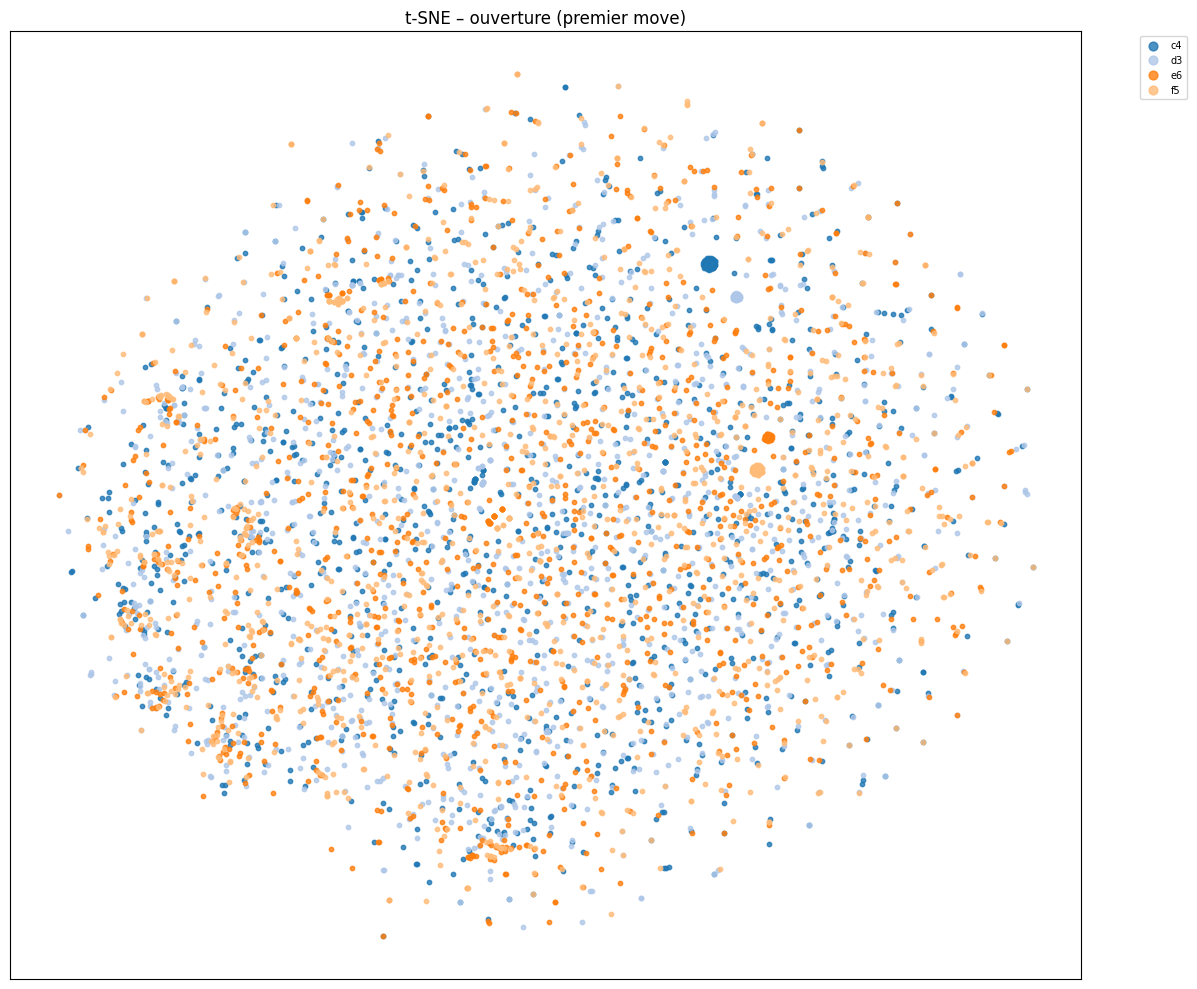

In [94]:
plot_categorical(tsne_emb, df_meta["opening"], "t-SNE – ouverture (premier move)")

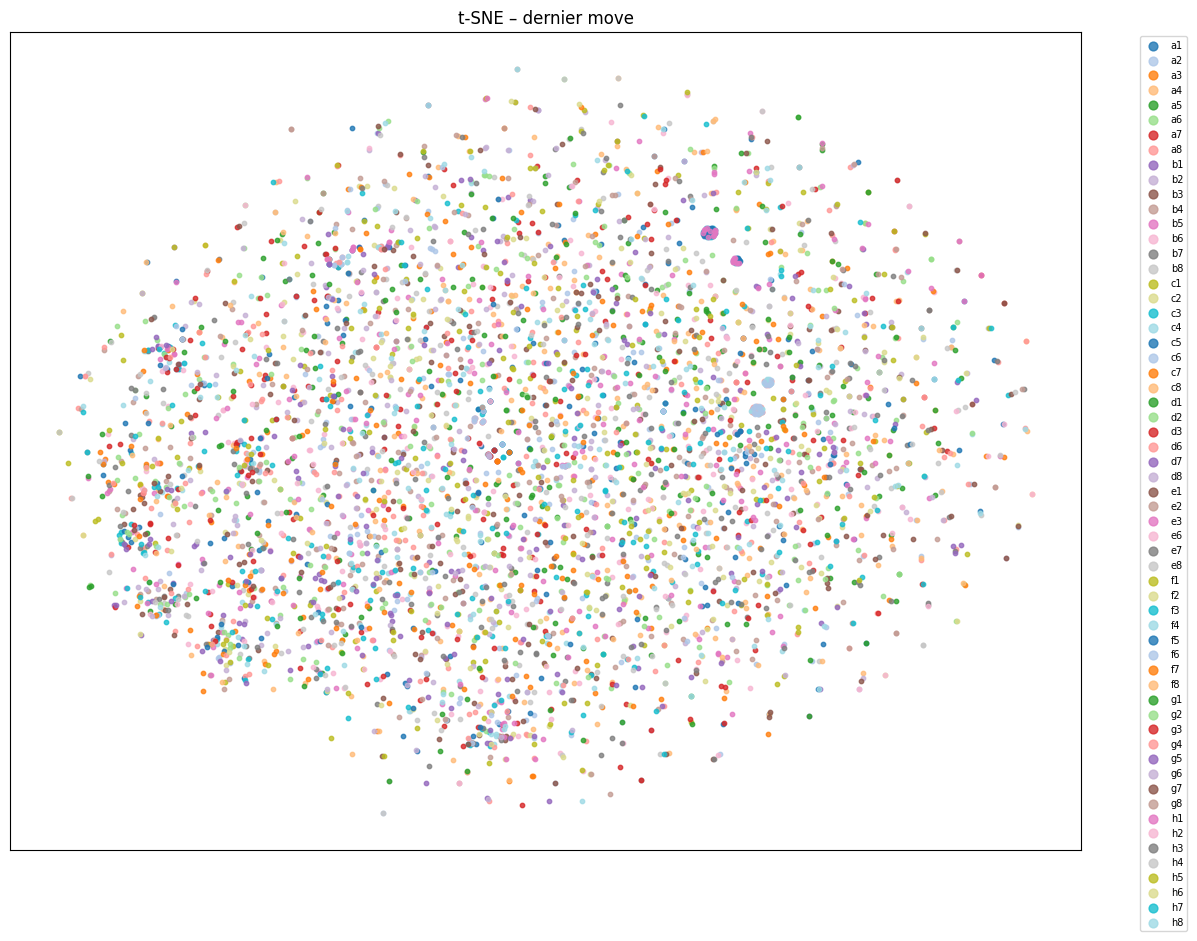

In [95]:
plot_categorical(tsne_emb, df_meta["last_move"], "t-SNE – dernier move")